# Customer Segmentation

<img src="https://github.com/Kodchalerk/Portfolio-project/blob/main/Raw%20Data/Customer-Segmentation.png?raw=True" alt="Drawing" style="width: 600px;"/>



**Context**

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

**Aims**

This notebook aims to perform customer segmentation by using the K-Prototype as clustering algorithm.

**Columns Description :**

ID : Customer's ID.

Gender : Customer's Gender (Male/Female)

Ever_Married : Marrital Statue of the Customer (Yes/No)

Age : Customer's Age

Graduated : If the Customer is Graduated or No (Yes/No)

Work_Experience : Customer's Work Experience in Years

Spending Score : Spending Score of the Customer (Low,Average,High)

Var_1 : Anonymised Category for the customer. ('Cat_1','Cat_2',..,'Cat_6')

Segmentation : Category of the Customer

**Link to dataset**: https://www.kaggle.com/datasets/vetrirah/customer

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read dataset
url = 'https://github.com/Kodchalerk/Portfolio-project/blob/main/Raw%20Data/segment.csv?raw=True'
df = pd.read_csv(url)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


# Data Cleaning

In [3]:
# Change column names
df.columns = [i.lower().replace(' ','_') for i in df.columns]
df.columns

Index(['id', 'gender', 'ever_married', 'age', 'graduated', 'profession',
       'work_experience', 'spending_score', 'family_size', 'var_1',
       'segmentation'],
      dtype='object')

In [4]:
# Drop unused columns
df.drop(columns = ['id','var_1','segmentation'] , inplace = True)

In [5]:
# Check null values
df.isnull().sum()

gender               0
ever_married       140
age                  0
graduated           78
profession         124
work_experience    829
spending_score       0
family_size        335
dtype: int64

In [6]:
# Check unique values
for i in df.columns:
    print('Name of column {}'.format(i))
    print(df[i].unique())
    print('Number of unique values in {} are {}'.format( i , df[i].nunique()))
    print('---------')

Name of column gender
['Male' 'Female']
Number of unique values in gender are 2
---------
Name of column ever_married
['No' 'Yes' nan]
Number of unique values in ever_married are 2
---------
Name of column age
[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Number of unique values in age are 67
---------
Name of column graduated
['No' 'Yes' nan]
Number of unique values in graduated are 2
---------
Name of column profession
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Number of unique values in profession are 9
---------
Name of column work_experience
[ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Number of unique values in work_experience are 15
---------
Name of column spending_score
['Low' 'Average' 'High']
Number of unique values in spending_scor

In [7]:
# Fill null values
df['ever_married'] = df['ever_married'].fillna('No')
df['graduated'] = df['graduated'].fillna('No')
df['work_experience'] = df['work_experience'].fillna(0)
df['family_size'] = df['family_size'].fillna(1)

In [8]:
# Drop the values which has null in profession column
df.dropna(subset = ['profession'] , inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7944 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7944 non-null   object 
 1   ever_married     7944 non-null   object 
 2   age              7944 non-null   int64  
 3   graduated        7944 non-null   object 
 4   profession       7944 non-null   object 
 5   work_experience  7944 non-null   float64
 6   spending_score   7944 non-null   object 
 7   family_size      7944 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 558.6+ KB


# Exploratory Data Analysis

## Exploring categorical feature

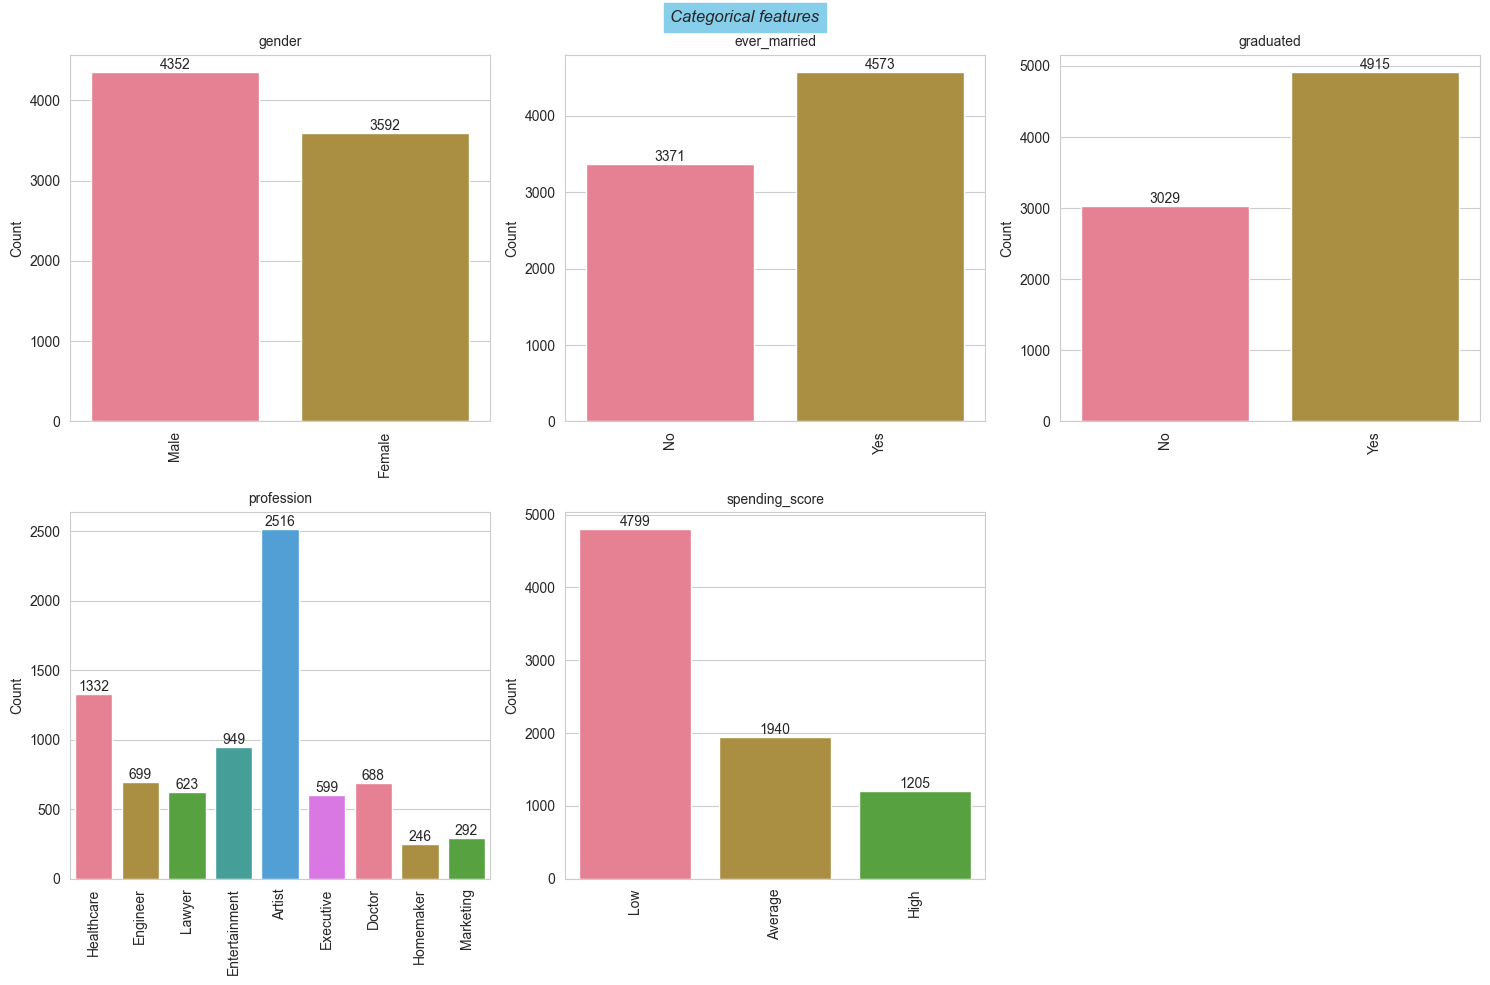

In [10]:
# Exploring categorical features
df_cat = df.select_dtypes('object')
fig = plt.figure(figsize = (15,10))
plt.suptitle('Categorical features',style = 'italic' , backgroundcolor = 'skyblue', font = 'Arial')

for i,j in enumerate(df_cat.columns):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.countplot(df , x = j, palette = sns.color_palette('husl') )
    ax.set_title(j , fontsize = 15 , style = 'italic', font = 'Arial')
    ax.set_xticklabels(labels = df[j].unique() , rotation = 90)
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    ax.bar_label(ax.containers[0],label_type='edge')
    
plt.tight_layout()    

## Exploring Numerical Features

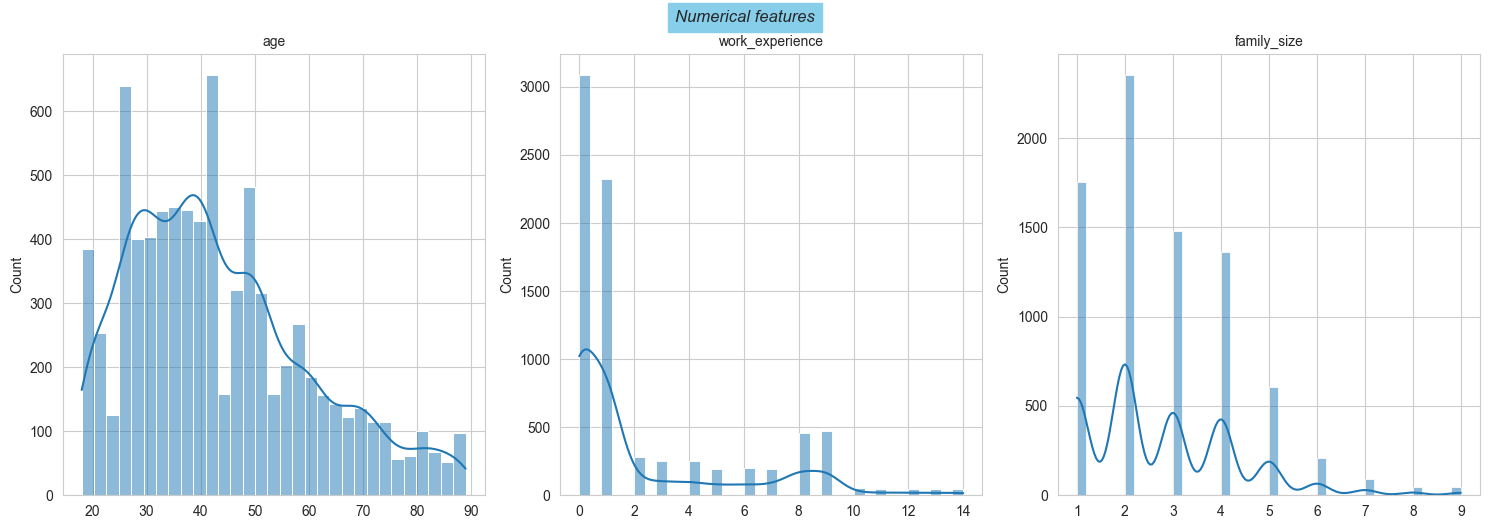

In [11]:
df_num = df.select_dtypes(['float64','int64'])
fig = plt.figure(figsize = (15,10))
plt.suptitle('Numerical features',style = 'italic' , backgroundcolor = 'skyblue', font = 'Arial')

for i,j in enumerate(df_num.columns):
    ax = fig.add_subplot(2,3,i+1)
    ax = sns.histplot(df , x = j, kde = True )
    ax.set_title(j , fontsize = 15 , style = 'italic', font = 'Arial')
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    
plt.tight_layout()    

# Data Preprocessing

In [12]:
df1 = df.copy()

In [13]:
df1

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,0.0,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0
...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0
8064,Male,No,35,No,Executive,3.0,Low,4.0
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0


In [14]:
prof = list(df['profession'].unique())
spend = list(df['spending_score'].unique())

df1['gender'] = df1['gender'].map({'Male' : 1 , 'Female' : 0})
df1['ever_married'] = df1['ever_married'].map({'Yes' : 1 , 'No' : 0})
df1['graduated'] = df1['graduated'].map({'Yes' : 1 , 'No' : 0})
df1['profession'] = df1['profession'].apply(lambda x : prof.index(x) + 1)
df1['spending_score'] = df1['spending_score'].apply(lambda x : spend.index(x) + 1)

In [17]:
df1.head(5)

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size
0,1,0,22,0,1,1.0,1,4.0
1,0,1,38,1,2,0.0,2,3.0
2,0,1,67,1,2,1.0,1,1.0
3,1,1,67,1,3,0.0,3,2.0
4,0,1,40,1,4,0.0,3,6.0


# Selecting optimal number of clustering

In [19]:
from kmodes.kprototypes import KPrototypes

In [22]:
dfMatrix = df1.to_numpy()
dfMatrix

array([[ 1.,  0., 22., ...,  1.,  1.,  4.],
       [ 0.,  1., 38., ...,  0.,  2.,  3.],
       [ 0.,  1., 67., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  0., 33., ...,  1.,  1.,  1.],
       [ 0.,  0., 27., ...,  1.,  1.,  4.],
       [ 1.,  1., 37., ...,  0.,  2.,  3.]])

In [26]:
cat_col_pos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
cat_col_pos

[0, 1, 3, 4, 6]

Cluster initiation 1
Cluster initiation 2
Cluster initiation 3
Cluster initiation 4
Cluster initiation 5
Cluster initiation 6
Cluster initiation 7
Cluster initiation 8
Cluster initiation 9


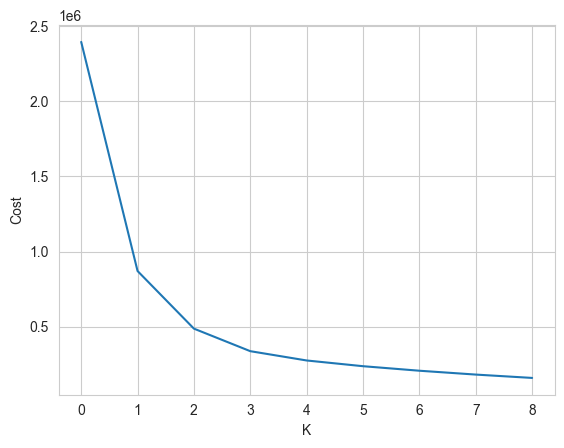

In [29]:
# Find optimal number of cluster

cost = []

for cluster in range(1,10):
    try:
        kprototype = KPrototypes(n_jobs = -1 , n_clusters = cluster , init = 'Huang' , random_state = 0)
        kprototype.fit_predict(dfMatrix , categorical = cat_col_pos )
        cost.append(kprototype.cost_)
        print('Cluster initiation {}'.format(cluster))
    except:
        break
plt.plot(cost)
plt.xlabel('K')
plt.ylabel('Cost')
plt.show()

In [33]:
from kneed import KneeLocator
cost_kneed = KneeLocator(x = range(1,10) , y = cost , S = 0.1 , curve = 'convex' , direction = 'decreasing' , online = True)
K_cost_c3 = cost_kneed.elbow
print('Elbow at k = {} clusters'.format(K_cost_c3))

Elbow at k = 3 clusters


In [40]:
# Label cluster and append to the df

kprototype = KPrototypes(n_jobs = -1 , n_clusters = 3 , init = 'Huang' , random_state = 0)
df['cluster'] = kprototype.fit_predict(dfMatrix , categorical = cat_col_pos)
df['cluster'] = df['cluster'].apply(lambda x : x+1)

In [50]:
df

,gender,ever_married,age,graduated,profession,work_experience,spending_score,family_size,cluster
0,Male,No,22,No,Healthcare,1.0,Low,4.0,3
1,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,2
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,1
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,1
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,2
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,2
8064,Male,No,35,No,Executive,3.0,Low,4.0,3
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,3
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,3


# Cluster Analysis

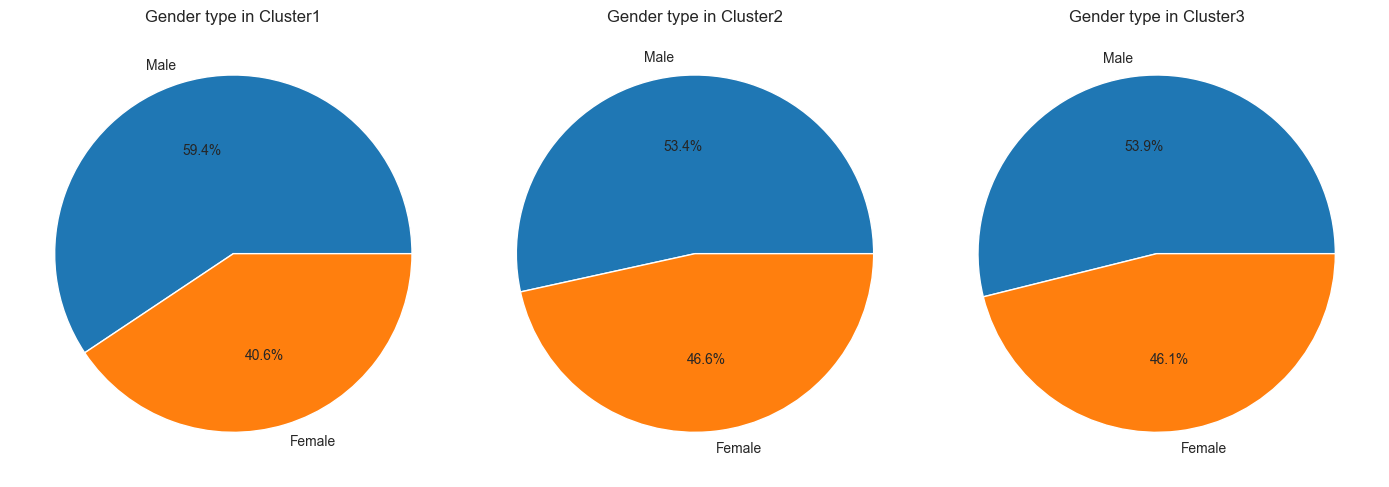

In [149]:
fig = plt.figure(figsize = (14,5))

for i in range(0,3):
    ax = fig.add_subplot(1,3,i+1)
    ax = plt.pie(data = df[df['cluster'] == i+1]['gender'].value_counts().to_frame() , x = 'gender' , labels = df[df['cluster'] == i+1]['gender'].value_counts().to_frame().index , autopct = '%1.1f%%' )
    plt.title('Gender type in Cluster' + str(i+1))
plt.tight_layout()

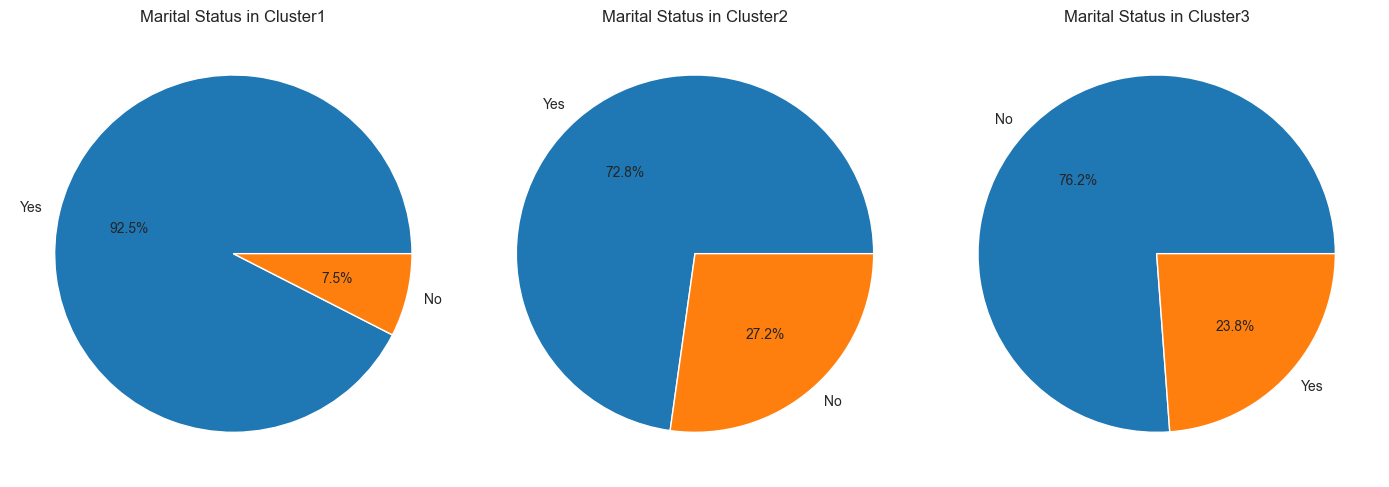

In [150]:
fig = plt.figure(figsize = (14,5))

for i in range(0,3):
    ax = fig.add_subplot(1,3,i+1)
    ax = plt.pie(data = df[df['cluster'] == i+1]['ever_married'].value_counts().to_frame() , x = 'ever_married' , labels = df[df['cluster'] == i+1]['ever_married'].value_counts().to_frame().index , autopct = '%1.1f%%' )
    plt.title('Marital Status in Cluster' + str(i+1))
plt.tight_layout()

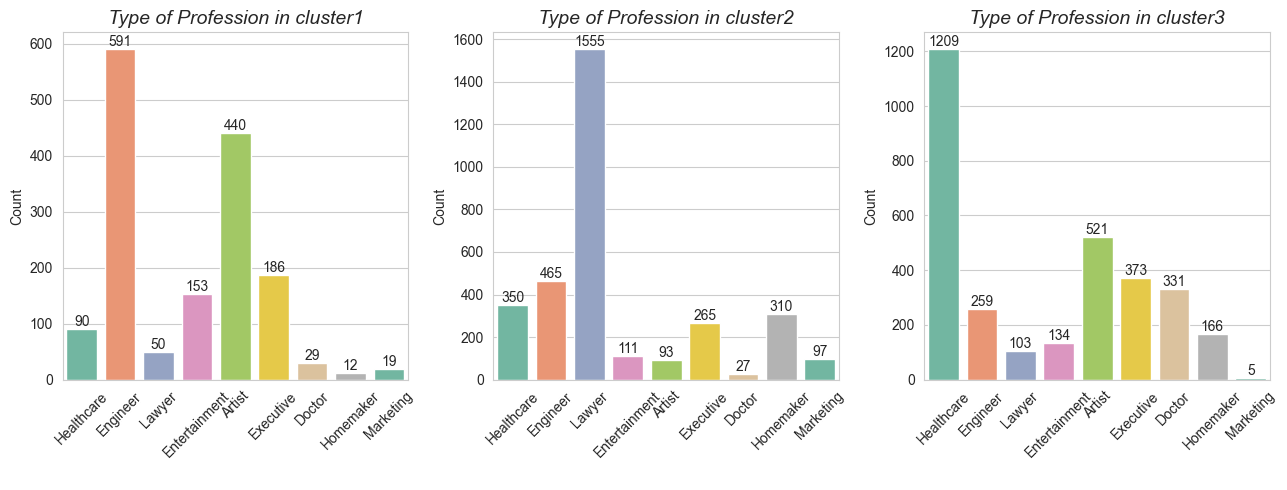

In [139]:
# Profession

fig = plt.figure(figsize = (13,5))

for i in range(0,3):
    ax = fig.add_subplot(1,3,i+1)
    ax = sns.countplot(df[df['cluster'] == i+1] , x = 'profession' , palette = sns.color_palette("Set2"))
    ax.set_title('Type of Profession in cluster' + str(i+1) , fontsize = 14 , style = 'italic')
    ax.set_ylabel('Count')
    ax.set_xlabel(' ')
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.set_xticklabels(labels = df['profession'].unique() , rotation = 45 )
plt.tight_layout()
    

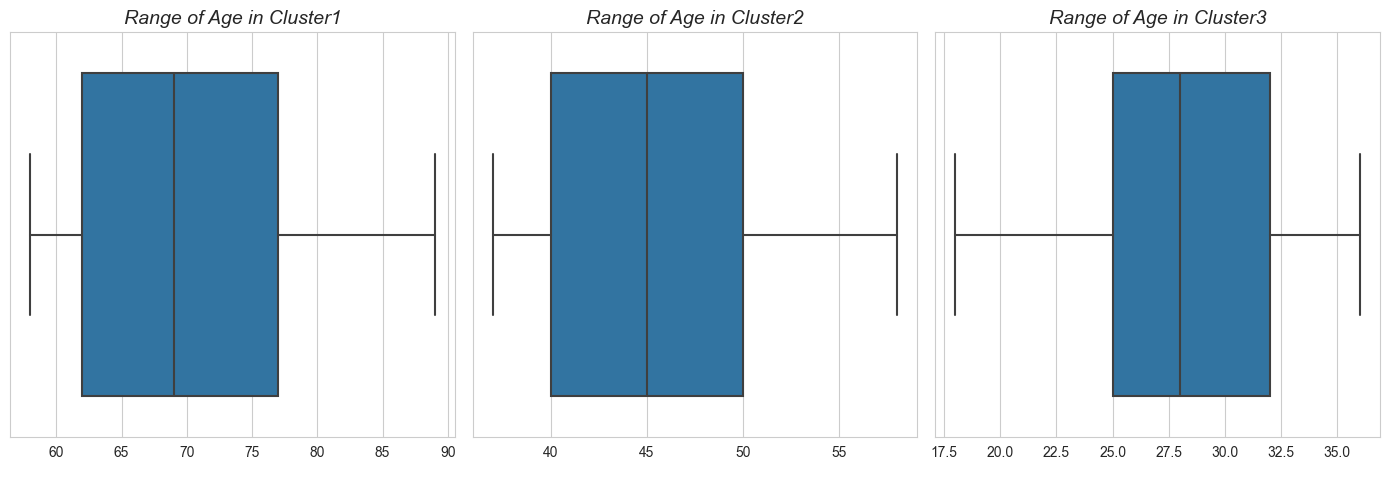

In [151]:
# Age

fig = plt.figure(figsize = (14,5))

for i in range(0,3):
    ax = fig.add_subplot(1,3,i+1)
    ax = sns.boxplot(df[df['cluster'] == i+1] , x = 'age')
    ax.set_title('Range of Age in Cluster' + str(i+1) , fontsize = 14 , style = 'italic')
    ax.set_xlabel(' ')
plt.tight_layout()
    

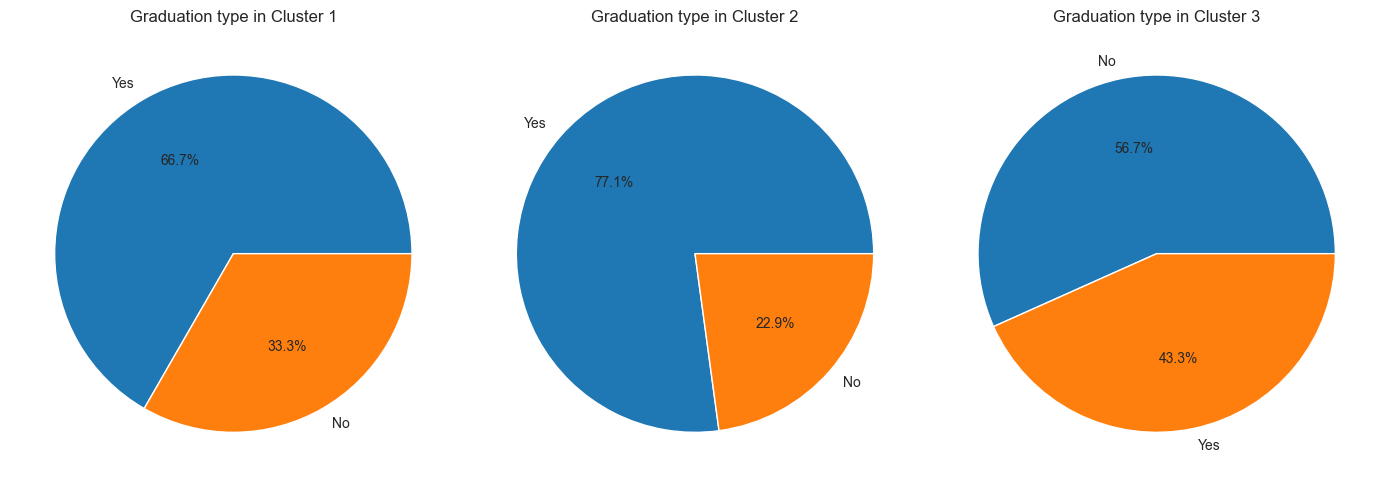

In [148]:
# Graduation

fig = plt.figure(figsize = (14,5))

for i in range(0,3):
    ax = fig.add_subplot(1,3,i+1)
    ax = plt.pie(data = df[df['cluster'] == i+1]['graduated'].value_counts().to_frame() , x = 'graduated' , labels = df[df['cluster'] == i+1]['graduated'].value_counts().to_frame().index , autopct = '%1.1f%%' )
    plt.title('Graduation type in Cluster ' + str(i+1))
plt.tight_layout()
    

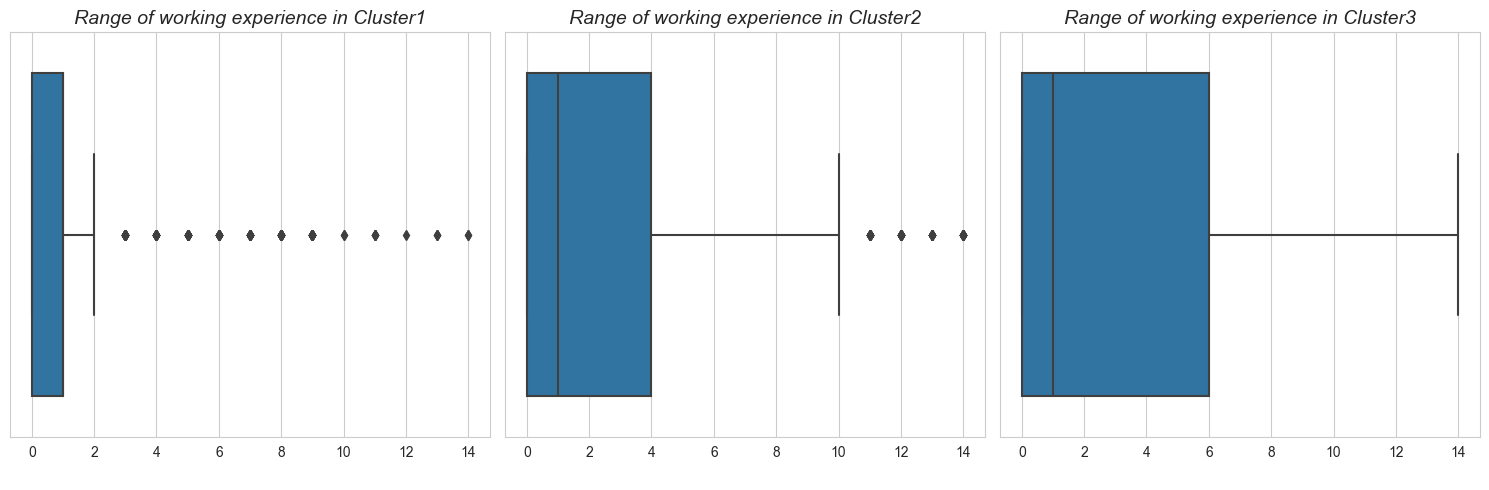

In [143]:
# Profession

fig = plt.figure(figsize = (15,5))

for i in range(0,3):
    ax = fig.add_subplot(1,3,i+1)
    ax = sns.boxplot(df[df['cluster'] == i+1] , x = 'work_experience')
    ax.set_title('Range of working experience in Cluster' + str(i+1) , fontsize = 14 , style = 'italic')
    ax.set_xlabel(' ')
plt.tight_layout()
    
    

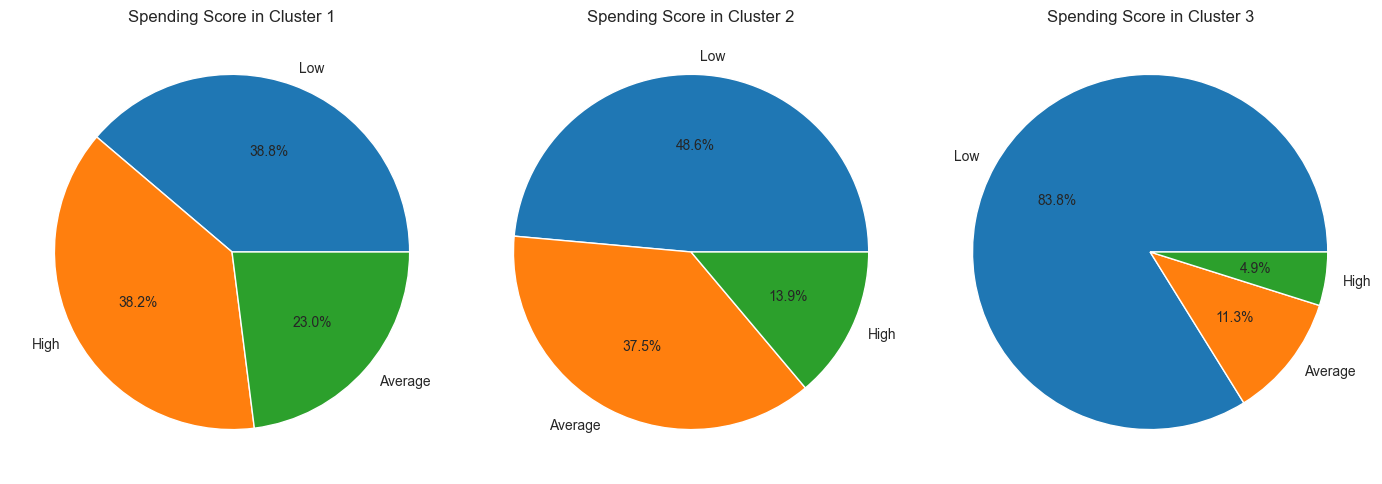

In [147]:
# Spending Score

fig = plt.figure(figsize = (14,5))

for i in range(0,3):
    ax = fig.add_subplot(1,3,i+1)
    ax = plt.pie(data = df[df['cluster'] == i+1]['spending_score'].value_counts().to_frame() , x = 'spending_score' , labels = df[df['cluster'] == i+1]['spending_score'].value_counts().to_frame().index , autopct = '%1.1f%%' )
    plt.title('Spending Score in Cluster ' + str(i+1))
plt.tight_layout()
    

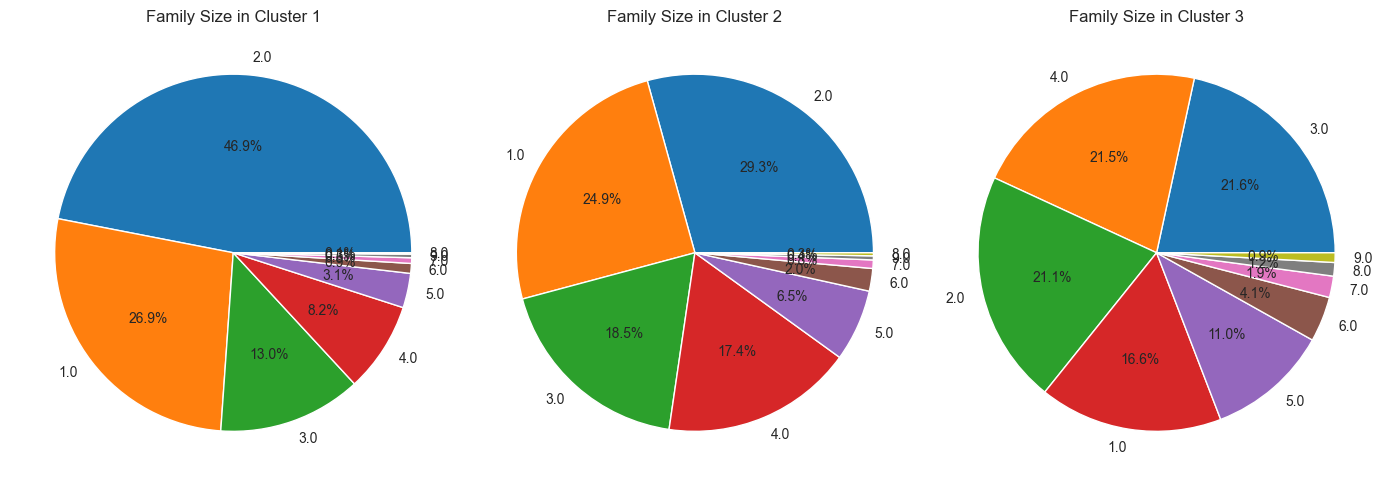

In [146]:
# Spending Score

fig = plt.figure(figsize = (14,5))

for i in range(0,3):
    ax = fig.add_subplot(1,3,i+1)
    ax = plt.pie(data = df[df['cluster'] == i+1]['family_size'].value_counts().to_frame() , x = 'family_size' , labels = df[df['cluster'] == i+1]['family_size'].value_counts().to_frame().index , autopct = '%1.1f%%' )
    plt.title('Family Size in Cluster ' + str(i+1))
plt.tight_layout()
    

# Summary
---

**The First Cluster**

- Gender: More men than women (58.4% and 40.6%)

- Marital status: Most of them are married (92.5%)

- Profession: The majority of them are Engineer and Artist

- Age: Considered to be old as the range of age is between 60 to 90 years old with 70 as an average age.

- Graduation: Most of them are graduated (66.7%)

- Spending score: High 38.2% / Average 23% / Low 38.8% 

- Family size: Most of them are living with their couples (familiy size 2 : 46.9%)

The first cluster is characterized by customers who are married and live with their couples. Most of them are engineers, artists, and executives. They are either budget shoppers or big spenders. Their average age is around 70 years old.

**The Second Cluster**

- Gender: More men than women (53.4% and 46.6%)

- Marital status: Most of them are married (72.8%)

- Profession: The majority of them are Lawyer

- Age: Considered to be in their middle age

- Graduation: Most of them are graduated (77.1%)

- Spending score: High 13.9% / Average 37.5% / Low 48.6% 

- Family size: Highly varied

The second cluster is characterized by customers who tend to be married and may have children or live with other people as they tend to have bigger size of families more than the first cluster. Most of them are lawyers and in their middle ages with the average age is around 45 years old. Most of them are either low spenders or average spenders.

**The Third Cluster**

- Gender: More men than women (53.9% and 48.6%)

- Marital status: Most of them are not married (76.2%)

- Profession: The majority of them are in Healthcare

- Age: Considered to be in their adulthood (17-35 years old)

- Graduation: Most of them are graduated (56.7%) which is lower than two previous clusters.

- Spending score: High 4.9% / Average 11.3% / Low 83.8% 

- Family size: Highly varied but tend to have bigger size family than cluster two.

The third cluster is characterized by customers who is not married and in their adulthood( The average age is around 28 years old). Most of them are in Healthcare sectors and tend to be concious spenders. The family size of this cluster is highly varied but tend to have bigger size families than cluster two.